<a href="https://colab.research.google.com/github/beniamine3155/deep_learning_tensorflow/blob/main/neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression with Tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Creating data to view and fit

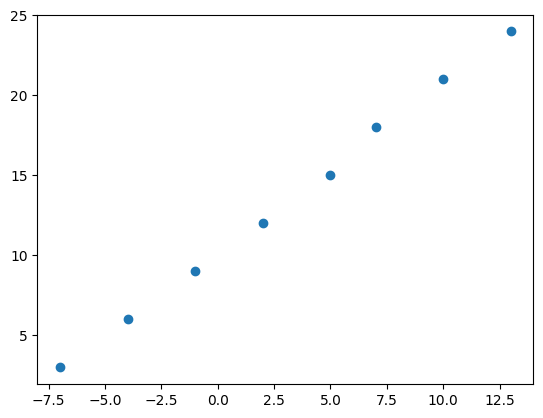

In [3]:
# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 7.0, 10.0, 13.0])

# create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, Y)

## Regression input shapes and output shapes

In [4]:
# input and output shape of a regression model
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

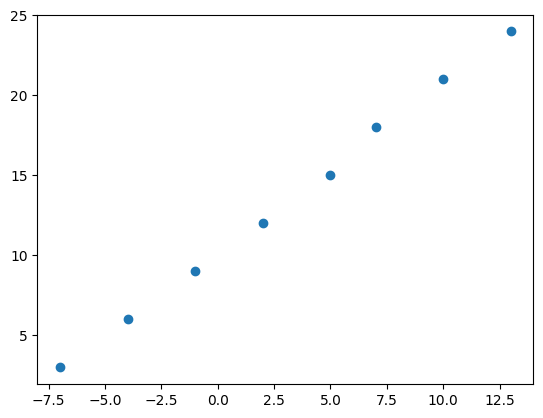

In [6]:
# create features using tensor
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 7.0, 10.0, 13.0])

# create labels using tensor
Y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);

In [7]:
# taking a single example of X
input_shape = X[0].shape

# taking a single example of Y
output_shape = Y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [8]:
# look at the single examples invidually
X[0], Y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

## Steps in modelling with TensorFlow

In [9]:
# set random seed
tf.random.set_seed(42)

# create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss = tf.keras.losses.mae, # mae -> mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # SGD -> Stochastic Gradient Descent
    metrics = ['mae']
)

# fit the model
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 10.3209 - mae: 10.3209
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 10.2132 - mae: 10.2132
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 10.1056 - mae: 10.1056
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 9.9979 - mae: 9.9979
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 9.8903 - mae: 9.8903


In [10]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  7., 10., 13.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 115ms/step


array([[20.000608]], dtype=float32)

## Improving a model

In [12]:
# set random seed
tf.random.set_seed(42)

# create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss = tf.keras.losses.mae, # mae -> mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # SGD -> Stochastic Gradient Descent
    metrics = ['mae']
)

# fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 433ms/step - loss: 13.6639 - mae: 13.6639
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5563 - mae: 13.5563
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4486 - mae: 13.4486
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3410 - mae: 13.3410
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 13.2333 - mae: 13.2333
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.1256 - mae: 13.1256
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 13.0180 - mae: 13.0180
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9103 - mae: 12.9103
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8027 - mae: 12.8027
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6950 - mae: 12.6950
Epoch 11/100
1/1 [==============================] - 0s 8

In [13]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  7., 10., 13.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)


1/1 [==============================] - 0s 78ms/step


array([[31.588205]], dtype=float32)

## Evaluating a model

In [18]:
# create a biggeer dataset
X = np.arange(-100, 100,  4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [19]:
# make label for the dataset
Y = np.arange(-90, 110, 4)
Y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [20]:
Y = X + 10
Y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set

In [21]:
# check how many samples we have
len(X)

50

In [22]:
# split data into train and test set
X_train = X[:40] # first 40 examples (80% of data)
Y_train = Y[:40]

X_test = X[40:] # last 10 examples (20% of data)
Y_test = Y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data

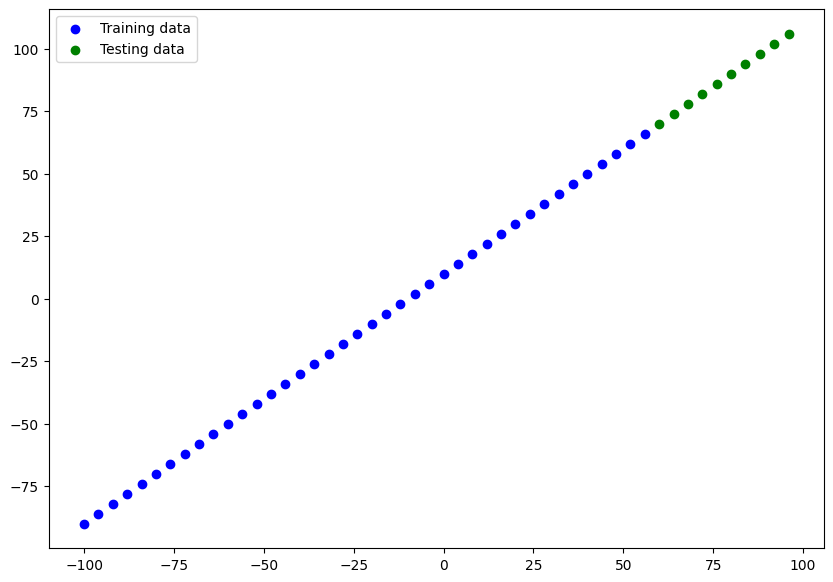

In [23]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, Y_train, c = 'b', label = 'Training data')
plt.scatter(X_test, Y_test, c = 'g', label =  'Testing data')
plt.legend()

## Visualizing the model

In [24]:
# set random seed
tf.random.set_seed(42)

# create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs = 100, verbose =0 ) # verbose controls how much gets output


In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


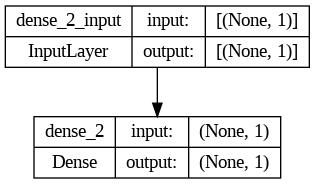

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

## Visualizing the predictions

In [29]:
# make predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 79ms/step


array([[ 74.63769 ],
       [ 79.52603 ],
       [ 84.414375],
       [ 89.30272 ],
       [ 94.19107 ],
       [ 99.079414],
       [103.96776 ],
       [108.85611 ],
       [113.74445 ],
       [118.6328  ]], dtype=float32)

In [30]:
def plot_predictions(
    train_data = X_train,
    train_labels = Y_train,
    test_data = X_test,
    test_labels = Y_test,
    predictions = y_preds):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_labels, c = 'b', label = "Training data")
  plt.scatter(test_data, test_labels, c = 'g', label = "Testing data")
  plt.scatter(test_data, predictions, c = 'r', label = "Predictions")
  plt.legend()

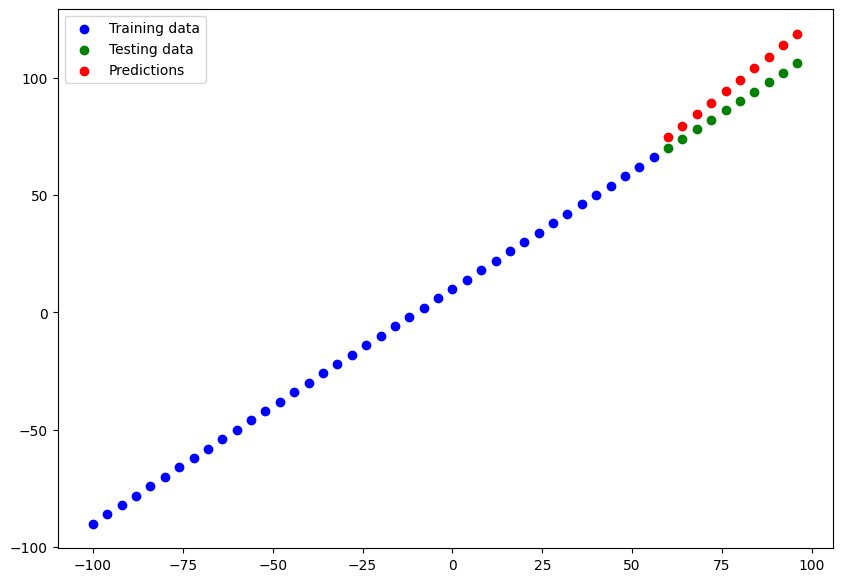

In [31]:
plot_predictions(
    train_data = X_train,
    train_labels = Y_train,
    test_data = X_test,
    test_labels = Y_test,
    predictions = y_preds)

## Evaluating predictions


In [32]:
# evaluate the model on the test set
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 195ms/step - loss: 8.6352 - mae: 8.6352


[8.635241508483887, 8.635241508483887]

In [33]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(
    y_true = Y_test,
    y_pred = y_preds
)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.417387, 11.789587, 10.317125, 10.      , 10.876429, 13.047648,
       16.374207, 20.85611 , 25.744452, 30.632797], dtype=float32)>

In [35]:
# check the test labels tensor value
Y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [36]:
# check the predictions tensor values
y_preds

array([[ 74.63769 ],
       [ 79.52603 ],
       [ 84.414375],
       [ 89.30272 ],
       [ 94.19107 ],
       [ 99.079414],
       [103.96776 ],
       [108.85611 ],
       [113.74445 ],
       [118.6328  ]], dtype=float32)

In [37]:
# check the tensor shape
Y_test.shape, y_preds.shape

((10,), (10, 1))

In [38]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [39]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [41]:
# What do they look like?
Y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ 74.63769 ,  79.52603 ,  84.414375,  89.30272 ,  94.19107 ,
         99.079414, 103.96776 , 108.85611 , 113.74445 , 118.6328  ],
       dtype=float32))

In [43]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=Y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.6352415>

In [44]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=Y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=81.07796>

In [45]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(Y_test - y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=8.63524169921875>